# Machine Learning using scikit-learn

### Heitor Murilo Gomes, PhD

### Senior Research Fellow, University of Waikato

[heitorgomes.com](http://heitorgomes.com/)

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

## Machine Lerning -> Classification -> scikit-learn library -> Code -> Profit

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

### scikit-learn website
https://scikit-learn.org/stable/index.html

### Choosing the right estimator
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### Examples
https://scikit-learn.org/stable/auto_examples/index.html


## Basic introduction to Machine Learning

* ```Machine learning tasks```
 * **supervised learning**: we have **labeled data**, the learning process has supervision, i.e. the algorithm is trained on data which we know the correct answer. 
 * **unsupervised learning**: we have only **unlabeled data**, the goal is to find groups or patterns
 * and... let's not talk about the others today. 

* ```Naming conventions```
 * Objects, Patterns, **Instances**, Examples, ... this is our **$X$**
 * Classes or Class labels, ... this is our **$y$**
 
* ```Relationship between label availability and learning task```
 * **Unlabeled data**: we only have $X$
 * **Labeled data**: we have $(X,y)$
 
 
* ```Classification algorithms```: 
 * Often called **Classifiers**
 * Examples: Logistic Regression, Decision Trees, Random Forest, ...
 
 
 
* ```Models```
 * A ```model``` is how we usually refer to a ```trained``` learning algorithm
 
 
* Well, well, well, what about ```deep learning```?
 * ```Deep learning``` is a broad term to refer to ```neural networks``` that are ```deep``` (or big or large). If you wish, you can think of deep learning as a subfield of machine learning. **NOT THE OTHER WAY AROUND**.
 


### Feature extraction/transformation
* Our abstractions of data are poor representations of their natural counterparts. 
 * A photo of a car miss a lot of the data around the car itself
 * A single health record is missing all the history about a patient
 * etc.

### Every learning algorithm is biased!
* To be able to learn anything, the algorithm has to make some assumptions. 
* These assumptions can be an excellent match for a given problem or they can be catastrophically wrong. 

### (Realistic) evaluation is key
* Usually, we don't train learning algorithms for fun, so we need to check if they work
* We want to know how well they perform on a specific scenario (i.e., a realistic scenario)
 * Usually, data that was not available before, for example, I train with all my data until 2019 and then I want to use it on data from 2020. 
 * We want the trained model to give us some useful predictions or insights, which we will them use to guide our decisions or make recommendations or confirm an hypothesis, and so on. 

<br><br><br><br><br><br><br><br><br><br><br><br><br>

## 0. Importing libraries
The important step of including someone else's code to solve our problem

In [2]:
from sklearn import datasets # The source of our data. 
from sklearn.tree import DecisionTreeClassifier # Our classifier.

# To estimate the predictive performance. 
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split

# Visualization
from sklearn import tree

# Other
import numpy as np

<br><br><br><br><br><br><br><br><br><br>

## 1. Loading the iris dataset

The ```iris dataset``` is available from scikit-learn, thus we don't need to download and load it from a local file. 

* Optionally, we could read it from a CSV file using [pandas.read_csv()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)

* More about [dataset.load_iris()](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html)

* There are three classes in the ```iris dataset```: 
<img src="versicolor_virginica_setosa.png">

In [4]:
## Loading the dataset
iris = datasets.load_iris()

In [8]:
# Quick look at the dataset
# about the zip function: https://docs.python.org/3.3/library/functions.html#zip

# iris.data
# iris.target
# list(zip(iris.data, iris.target))
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

## 2. Let's train a first model!

### 2.1 Split the data into ```train``` and ```test``` datasets 

```train``` the model on part of the data and ```test``` it on the remaining instances. 

* There are many ways of doing that, for example using [model_selection.train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)


In [9]:
# Split the data: train and test

# Train data: the first 100 instances... 
X_train = iris.data[0:100]
y_train = iris.target[0:100]

# Test data: the remaining 50 instances... 
X_test = iris.data[100:150]
y_test = iris.target[100:150]


## Important

### (1) There <font color='red'>shouldn't be any intersection</font> between ```train``` and ```test```! 

### (2) Both the ```train``` and ```test``` should be a <font color='red'>realistic representation of the learning problem</font>


<p>We achieved (1) with the code above, but what about (2)? </p>

Let's ```ignore``` this for a moment and move on... 

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

## 2.2 Let's train a model

* We are going to train a [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
* A comprehensive discussion about the differences between [hyperparameters and parameters](https://machinelearningmastery.com/difference-between-a-parameter-and-a-hyperparameter/)
* Reference about decision trees: 
 * *L. Breiman, J. Friedman, R. Olshen, and C. Stone, “Classification and Regression Trees”, Wadsworth, Belmont, CA, 1984.* 
 * Optionally, there are hundreds of tutorials on the web about Decision Trees. 



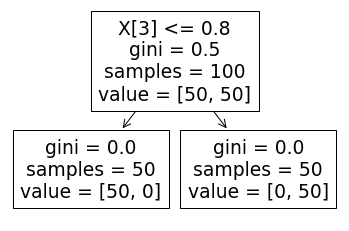

In [11]:
# Create a decision tree classifier, here we specify the hyperparameters
decisionTree = DecisionTreeClassifier()

# Obtain the trained model given the decision tree classifier
decisionTreeModel = decisionTree.fit(X=X_train, y=y_train)

# To visualize our trained decision tree model
tree.plot_tree(decisionTreeModel);

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

## 2.3 Let's evaluate our model

First, we obtain the model predictions using the [```predict(X_train)```](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.predict) function

It will use our trained ```decisionTreeModel``` to generate a prediction

for each entry in the given dataset (i.e., ```X_train```)

In [12]:
# Use the trained model to make some predictions on the training data X_train
# Ops! Something is wrong here... 
y_predictions_train = decisionTreeModel.predict(X_train)

In [13]:
list(zip(X_train, y_predictions_train, y_train))

[(array([5.1, 3.5, 1.4, 0.2]), 0, 0),
 (array([4.9, 3. , 1.4, 0.2]), 0, 0),
 (array([4.7, 3.2, 1.3, 0.2]), 0, 0),
 (array([4.6, 3.1, 1.5, 0.2]), 0, 0),
 (array([5. , 3.6, 1.4, 0.2]), 0, 0),
 (array([5.4, 3.9, 1.7, 0.4]), 0, 0),
 (array([4.6, 3.4, 1.4, 0.3]), 0, 0),
 (array([5. , 3.4, 1.5, 0.2]), 0, 0),
 (array([4.4, 2.9, 1.4, 0.2]), 0, 0),
 (array([4.9, 3.1, 1.5, 0.1]), 0, 0),
 (array([5.4, 3.7, 1.5, 0.2]), 0, 0),
 (array([4.8, 3.4, 1.6, 0.2]), 0, 0),
 (array([4.8, 3. , 1.4, 0.1]), 0, 0),
 (array([4.3, 3. , 1.1, 0.1]), 0, 0),
 (array([5.8, 4. , 1.2, 0.2]), 0, 0),
 (array([5.7, 4.4, 1.5, 0.4]), 0, 0),
 (array([5.4, 3.9, 1.3, 0.4]), 0, 0),
 (array([5.1, 3.5, 1.4, 0.3]), 0, 0),
 (array([5.7, 3.8, 1.7, 0.3]), 0, 0),
 (array([5.1, 3.8, 1.5, 0.3]), 0, 0),
 (array([5.4, 3.4, 1.7, 0.2]), 0, 0),
 (array([5.1, 3.7, 1.5, 0.4]), 0, 0),
 (array([4.6, 3.6, 1. , 0.2]), 0, 0),
 (array([5.1, 3.3, 1.7, 0.5]), 0, 0),
 (array([4.8, 3.4, 1.9, 0.2]), 0, 0),
 (array([5. , 3. , 1.6, 0.2]), 0, 0),
 (array([5. 

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

### 2.3.1 What about a single scalar to assess the predictive performance?

We will use the ```accuracy_score```, which is the most intuitive metric. 

* Accuracy:  

<font color='green'>sum of all correct of predictions</font> **divided** by all the predictions made (<font color='green'>correct</font> and <font color='red'>incorrect</font>)

* The accuracy ranges from **0.0** (all predictions are incorrect) to **1.0** (all predictions are correct)
* More about the [accuracy_score()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html?highlight=accuracy#sklearn.metrics.accuracy_score)

In [14]:
# Obtain the accuracy on the training data
accuracy_score(y_train, y_predictions_train)

1.0

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>


### 2.4 Analyzing the results

Before we celebrate... Let's get back to this:
 
### "(2) Both the ```train``` and ```test``` should be a <font color='red'>realistic representation of the learning problem"
    
## <font color='red'>What went wrong?!</font>
<!-- <img src='White_square_with_question_mark.png' style="float:left"> -->

# Answer: 

# First of all, we must <font color='red'>not train and test on the same dataset</font>
This approach will mislead us into building models that are unable to generalize to unseen data. 

## Let's try to fix this by testing on the test dataset... 

In [16]:
# Obtain the predictions for X_test
y_predictions_test = decisionTreeModel.predict(X_test)

# Obtain the accuracy by comparing y_test with y_predictions_test
accuracy_score(y_test, y_predictions_test)

0.0

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

# Oh that is <font color='red'>great</font>! We went from 1.0 accuracy to 0.0

## We miss every possible prediction on the test set!


## <font color='red'>What happened?</font>

In [18]:
## let's look at the predictions vs the actual values...
# list(zip(X_test, y_predictions_test, y_test))

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

## 2.5 There is a problem with how we split the dataset... 

### Both the train and the test datasets do not represent well the learning problem... <font color='red'>why?</font>

### There is <font color='red'>one class missing</font> from the <font color='red'>train</font> dataset and <font color='red'>two classes are missing</font> from the <font color='red'>test</font> dataset!



In [19]:
## Let's look at the labes in y_test
y_test

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2])

In [20]:
## and y_train
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

### 2.6 Summarizing what we know so far

* <font color='red'>The learning algorithm can only learn from the data we present to it</font>. If we don't show it class 2, then it will assume class 2 doesn't exists! 

## Machine learning is not magic :-(

* We don't want a model that is only capable of perfectly reproducing the train dataset. 

* We want to observe how well the model perform on previously unseen data, i.e. it was not used for training it. 

* We want ```generalization```! We want to avoid ```overfitting``` and ```underfitting```!
 * [How to Identify Overfitting Machine Learning Models in Scikit-Learn](https://machinelearningmastery.com/overfitting-machine-learning-models/). 
 * [Overfitting and Underfitting With Machine Learning Algorithms](https://machinelearningmastery.com/overfitting-and-underfitting-with-machine-learning-algorithms/)



<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

## 3. Let's build another model

### How do we split the data?
* Shuffle the dataset before splitting it into train and test. One possibility is [sklearn.utils.shuffle](https://scikit-learn.org/stable/modules/generated/sklearn.utils.shuffle.html)... 
* or we could simply use [model_selection.train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html), which is much easier!

In [27]:
# train_test_split has multiple returns... 
X_train, X_test, y_train, y_test = train_test_split(iris.data, 
                                                    iris.target, 
                                                    test_size=0.30, 
                                                    random_state=42, stratify=iris.target)

In [28]:
## Using numpy to count the number of occurrences of each class in y_train
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{0: 35, 1: 35, 2: 35}

In [29]:
# Same... but using y_test
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

{0: 15, 1: 15, 2: 15}

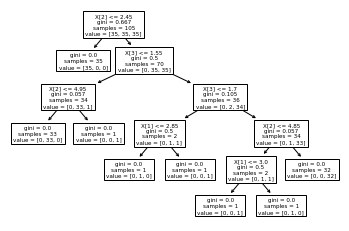

In [31]:
# Let's train the model again... 
decisionTree = DecisionTreeClassifier(random_state=42)

decisionTreeModelCorrect = decisionTree.fit(X_train, y_train)
tree.plot_tree(decisionTreeModelCorrect);

### 3.1 Analyzing the results
* This time we also include a [confusion_matrix](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html).
See [plot_confusion_matrix()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html) as well. 

In [32]:
y_predictions = decisionTreeModelCorrect.predict(X_test)
accuracy_score(y_test, y_predictions)

0.9333333333333333

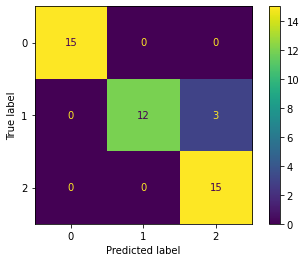

In [33]:
plot_confusion_matrix(decisionTreeModelCorrect, X_test, y_test);

### 4. Where to go from here?
* Check [scikit-learn websites](https://scikit-learn.org/stable/) for tutorials
* [UCI website](https://archive.ics.uci.edu/ml/index.php) contains several datasets for study
* [Kaggle](https://www.kaggle.com) is a good resource for datasets and machine learning competitions

Thank you!

Heitor Murilo Gomes

Contact: [heitorgomes.com](http://heitorgomes.com/)